In [126]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

In [127]:
df = pd.read_csv("BankChurnersTrain.csv")

In [128]:
import dtale
dtale.show(df)

In [129]:
df.head()

,CCNum,Trans_date_Time,Attrition_Flag,Surname,Age,Gender,CreditScore,Geography,Tenure,Education_Level,...,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,is_fraud,Exited
0,768805383,01/01/2019 00:00,Existing Customer,Hargrave,45,M,619,France,2,High School,...,12691.0,1144,42,0.00,1,1,1,101348.88,0,1
1,818770008,01/01/2019 00:00,Existing Customer,Hill,49,F,608,Spain,1,Graduate,...,8256.0,1291,33,83807.86,1,0,1,112542.58,0,0
2,713982108,01/01/2019 00:00,Existing Customer,Onio,51,M,502,France,8,Graduate,...,3418.0,1887,20,159660.80,3,1,0,113931.57,0,1
3,769911858,01/01/2019 00:01,Existing Customer,Boni,40,F,699,France,1,High School,...,3313.0,1171,20,0.00,2,0,0,93826.63,0,0
4,709106358,01/01/2019 00:03,Existing Customer,Mitchell,40,M,850,Spain,2,Uneducated,...,4716.0,816,28,125510.82,1,1,1,79084.10,0,0


## Drop irrelevant columns

In [130]:
df = df.drop(["CCNum", "Surname"], axis = 1)

In [131]:
df.head()

,Trans_date_Time,Attrition_Flag,Age,Gender,CreditScore,Geography,Tenure,Education_Level,Income_Category,Card_Category,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,is_fraud,Exited
0,01/01/2019 00:00,Existing Customer,45,M,619,France,2,High School,$60K - $80K,Blue,12691.0,1144,42,0.00,1,1,1,101348.88,0,1
1,01/01/2019 00:00,Existing Customer,49,F,608,Spain,1,Graduate,Less than $40K,Blue,8256.0,1291,33,83807.86,1,0,1,112542.58,0,0
2,01/01/2019 00:00,Existing Customer,51,M,502,France,8,Graduate,$80K - $120K,Blue,3418.0,1887,20,159660.80,3,1,0,113931.57,0,1
3,01/01/2019 00:01,Existing Customer,40,F,699,France,1,High School,Less than $40K,Blue,3313.0,1171,20,0.00,2,0,0,93826.63,0,0
4,01/01/2019 00:03,Existing Customer,40,M,850,Spain,2,Uneducated,$60K - $80K,Blue,4716.0,816,28,125510.82,1,1,1,79084.10,0,0


In [132]:
df.shape

(10000, 20)

In [133]:
df["Education_Level"].value_counts()

Graduate         3079
High School      1984
Unknown          1505
Uneducated       1470
College          1004
Post-Graduate     514
Doctorate         444
Name: Education_Level, dtype: int64

In [134]:
df.columns

Index(['Trans_date_Time', 'Attrition_Flag', 'Age', 'Gender', 'CreditScore',
       'Geography', 'Tenure', 'Education_Level', 'Income_Category',
       'Card_Category', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'is_fraud', 'Exited'],
      dtype='object')

In [135]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Trans_date_Time', 'Attrition_Flag', 'Gender', 'Geography', 'Education_Level', 'Income_Category', 'Card_Category']


In [136]:
df_inactive = df.loc[(df['IsActiveMember'] == 0)]
df_inactive.head()

,Trans_date_Time,Attrition_Flag,Age,Gender,CreditScore,Geography,Tenure,Education_Level,Income_Category,Card_Category,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,is_fraud,Exited
2,01/01/2019 00:00,Existing Customer,51,M,502,France,8,Graduate,$80K - $120K,Blue,3418.0,1887,20,159660.80,3,1,0,113931.57,0,1
3,01/01/2019 00:01,Existing Customer,40,F,699,France,1,High School,Less than $40K,Blue,3313.0,1171,20,0.00,2,0,0,93826.63,0,0
5,01/01/2019 00:04,Existing Customer,44,M,645,Spain,8,Graduate,$40K - $60K,Blue,4010.0,1088,24,113755.78,2,1,0,149756.71,0,1
7,01/01/2019 00:05,Existing Customer,32,M,376,Germany,4,High School,$60K - $80K,Silver,29081.0,1538,36,115046.74,4,1,0,119346.88,0,1
10,01/01/2019 00:06,Existing Customer,42,M,528,France,6,Uneducated,$120K +,Blue,6748.0,1201,42,102016.72,2,0,0,80181.12,0,0


In [137]:
df_inactive.shape

(4849, 20)

### About half of the customers are classed as 'inactive'

In [138]:
df_exited = df.loc[(df['Exited'] == 1)]
df_exited.head()

,Trans_date_Time,Attrition_Flag,Age,Gender,CreditScore,Geography,Tenure,Education_Level,Income_Category,Card_Category,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,is_fraud,Exited
0,01/01/2019 00:00,Existing Customer,45,M,619,France,2,High School,$60K - $80K,Blue,12691.0,1144,42,0.00,1,1,1,101348.88,0,1
2,01/01/2019 00:00,Existing Customer,51,M,502,France,8,Graduate,$80K - $120K,Blue,3418.0,1887,20,159660.80,3,1,0,113931.57,0,1
5,01/01/2019 00:04,Existing Customer,44,M,645,Spain,8,Graduate,$40K - $60K,Blue,4010.0,1088,24,113755.78,2,1,0,149756.71,0,1
7,01/01/2019 00:05,Existing Customer,32,M,376,Germany,4,High School,$60K - $80K,Silver,29081.0,1538,36,115046.74,4,1,0,119346.88,0,1
16,01/01/2019 00:10,Existing Customer,48,M,653,Germany,1,Post-Graduate,$80K - $120K,Blue,30367.0,1671,27,132602.88,1,1,0,5097.67,0,1


In [139]:
df_exited.shape

(2037, 20)

### About 20% of customers have left the bank

In [140]:
df.describe()

,Age,CreditScore,Tenure,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,is_fraud,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,46.336500,650.528800,5.012800,8580.571410,4288.835800,64.429400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.004700,0.203700
std,8.012109,96.653299,2.892174,9062.598294,3239.782959,23.173332,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.068399,0.402769
min,26.000000,350.000000,0.000000,1438.300000,510.000000,10.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,41.000000,584.000000,3.000000,2539.750000,2141.000000,45.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,46.000000,652.000000,5.000000,4499.500000,3873.500000,67.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000
75%,52.000000,718.000000,7.000000,10964.500000,4707.250000,80.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000
max,73.000000,850.000000,10.000000,34516.000000,18484.000000,139.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000


In [141]:
df_inactive.describe()

,Age,CreditScore,Tenure,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,is_fraud,Exited
count,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.0,4849.000000,4849.000000,4849.000000
mean,46.465663,647.973603,5.097340,8466.514683,4257.750052,64.363786,77134.376863,1.524438,0.711074,0.0,100767.203854,0.004125,0.268509
std,8.058452,97.725193,2.883465,8946.023940,3221.448926,23.039231,62545.195018,0.592401,0.453310,0.0,57561.190241,0.064097,0.443230
min,26.000000,350.000000,0.000000,1438.300000,530.000000,10.000000,0.000000,1.000000,0.000000,0.0,91.750000,0.000000,0.000000
25%,41.000000,581.000000,3.000000,2567.000000,2130.000000,45.000000,0.000000,1.000000,0.000000,0.0,51553.430000,0.000000,0.000000
50%,46.000000,650.000000,5.000000,4440.000000,3863.000000,67.000000,98263.460000,1.000000,1.000000,0.0,100686.110000,0.000000,0.000000
75%,52.000000,716.000000,8.000000,10730.000000,4681.000000,80.000000,128270.560000,2.000000,1.000000,0.0,149913.840000,0.000000,1.000000
max,70.000000,850.000000,10.000000,34516.000000,18484.000000,134.000000,222267.630000,4.000000,1.000000,0.0,199992.480000,1.000000,1.000000


In [142]:
df_exited.describe()

,Age,CreditScore,Tenure,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,is_fraud,Exited
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,46.295533,645.351497,4.932744,8492.116740,4144.073147,63.757977,91108.539337,1.475209,0.699067,0.360825,101465.677531,0.005891,1.0
std,8.034494,100.321503,2.936106,8950.780212,3108.897794,23.163993,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.076545,0.0
min,26.000000,350.000000,0.000000,1438.300000,510.000000,10.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,1.0
25%,41.000000,578.000000,2.000000,2478.000000,2086.000000,43.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,0.000000,1.0
50%,46.000000,646.000000,5.000000,4409.000000,3806.000000,67.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,0.000000,1.0
75%,52.000000,716.000000,8.000000,10998.000000,4636.000000,80.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,0.000000,1.0
max,68.000000,850.000000,10.000000,34516.000000,16824.000000,131.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.000000,1.0


Exited Customers tend to have a higher balance (balance may be indicator of fraud?) 

## Visualising Exit Rate

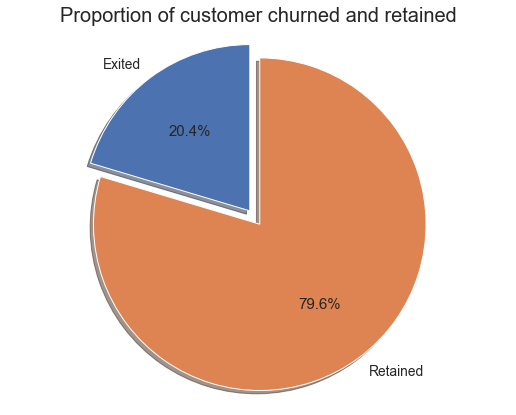

In [168]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

### Approximately 20% of customers have exited the bank - hence data set is imbalanced

Text(0.5, 1.0, 'Countplot-Geography Column')

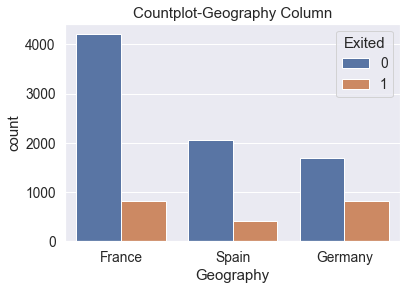

In [169]:
sns.countplot(x='Geography', hue = 'Exited',data = df).set_title('Countplot-Geography Column')

In [170]:
print (pd.crosstab(df["Geography"],df["Exited"]))

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413


French customers account for 52.15% of customers - 16.1 % of french customers have left
German customers account for 25% of customers - 32% of german customers have left
Spainish customers account for 24.77% of customers - 16.6% of spanish customers have left

Text(0.5, 1.0, 'Countplot-Gender Column')

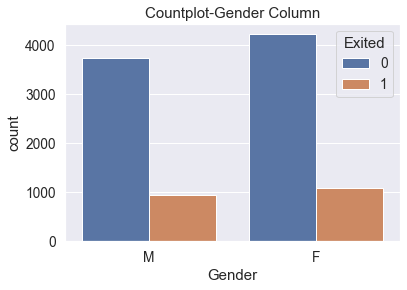

In [171]:
sns.countplot(x='Gender', hue = 'Exited',data = df).set_title('Countplot-Gender Column')


In [172]:
print (pd.crosstab(df["Gender"],df["Exited"]))

Exited     0     1
Gender            
F       4223  1093
M       3740   944


Text(0.5, 1.0, 'Countplot-HasCreditCard Column')

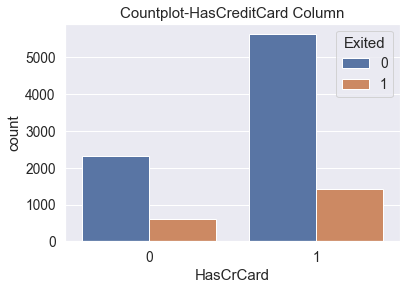

In [173]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df).set_title('Countplot-HasCreditCard Column')


In [174]:
print (pd.crosstab(df["HasCrCard"],df["Exited"]))

Exited        0     1
HasCrCard            
0          2332   613
1          5631  1424


Text(0.5, 1.0, 'Countplot-HasCreditCard Column')

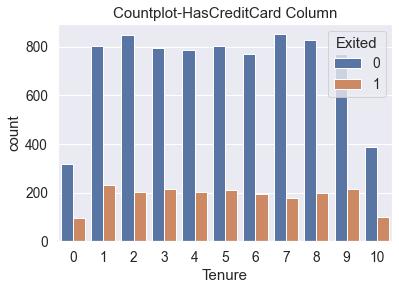

In [175]:
sns.countplot(x='Tenure', hue = 'Exited',data = df).set_title('Countplot-HasCreditCard Column')


In [176]:
print (pd.crosstab(df["Tenure"],df["Exited"]))

Exited    0    1
Tenure          
0       318   95
1       803  232
2       847  201
3       796  213
4       786  203
5       803  209
6       771  196
7       851  177
8       828  197
9       771  213
10      389  101


Text(0.5, 1.0, 'Countplot-HasCreditCard Column')

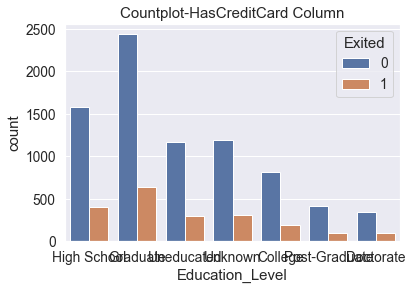

In [177]:
sns.countplot(x='Education_Level', hue = 'Exited',data = df).set_title('Countplot-HasCreditCard Column')


Text(0.5, 1.0, 'Countplot-HasCreditCard Column')

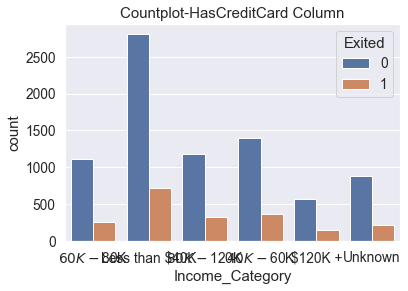

In [178]:
sns.countplot(x='Income_Category', hue = 'Exited',data = df).set_title('Countplot-HasCreditCard Column')


<AxesSubplot: xlabel='Exited', ylabel='EstimatedSalary'>

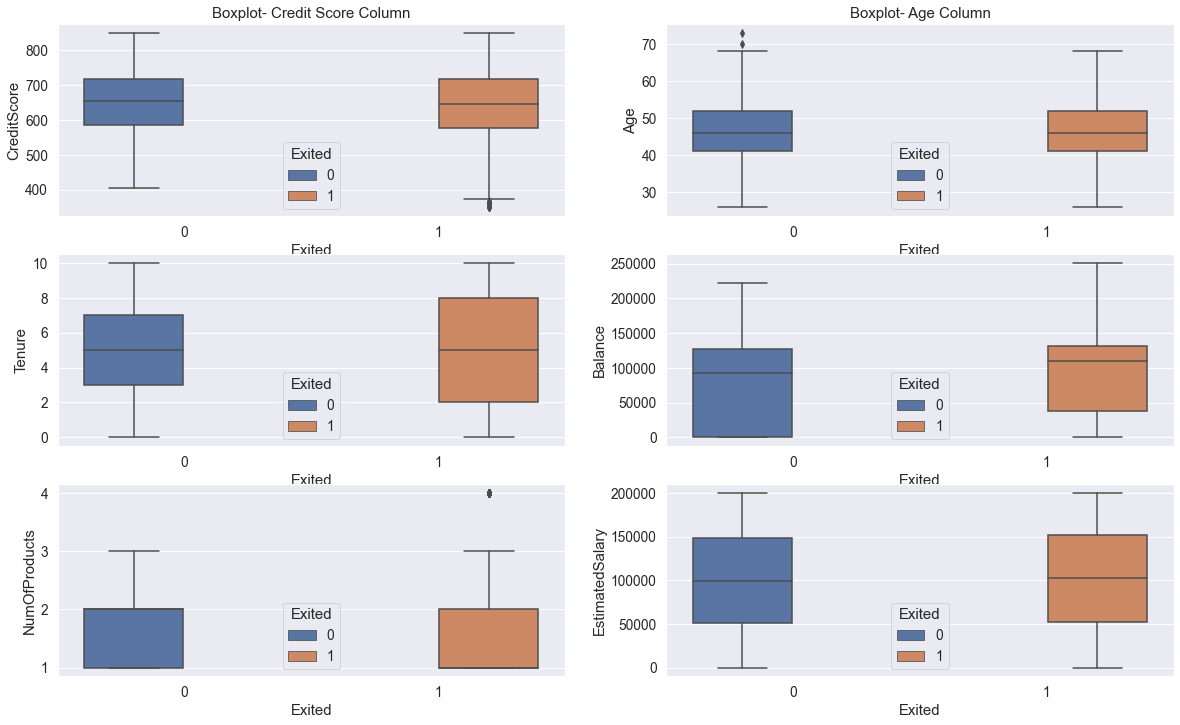

In [179]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0]).set_title('Boxplot- Credit Score Column')
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1]).set_title('Boxplot- Age Column')
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

We can seen customers who churn have a slightly higher balance than those who don't 

In [180]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [182]:
encode_df = pd.get_dummies(df, columns=['Attrition_Flag','IsActiveMember','HasCrCard', 'Gender', 'Geography', 'Education_Level', 'Income_Category', 'Card_Category'])

In [183]:
encode_df.head()

,Age,CreditScore,Tenure,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,EstimatedSalary,is_fraud,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,619,2,12691.0,1144,42,0.00,1,101348.88,0,...,0,0,1,0,0,0,1,0,0,0
1,49,608,1,8256.0,1291,33,83807.86,1,112542.58,0,...,0,0,0,0,1,0,1,0,0,0
2,51,502,8,3418.0,1887,20,159660.80,3,113931.57,0,...,0,0,0,1,0,0,1,0,0,0
3,40,699,1,3313.0,1171,20,0.00,2,93826.63,0,...,0,0,0,0,1,0,1,0,0,0
4,40,850,2,4716.0,816,28,125510.82,1,79084.10,0,...,0,0,1,0,0,0,1,0,0,0


In [184]:
encode_df.columns

Index(['Age', 'CreditScore', 'Tenure', 'Credit_Limit', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Balance', 'NumOfProducts', 'EstimatedSalary',
       'is_fraud', 'Exited', 'Attrition_Flag_Attrited Customer',
       'Attrition_Flag_Existing Customer', 'IsActiveMember_0',
       'IsActiveMember_1', 'HasCrCard_0', 'HasCrCard_1', 'Gender_F',
       'Gender_M', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [185]:
rename_cols = {
    'Attrition_Flag_Attrited Customer': 'Attrited_Customer',
    'Attrition_Flag_Existing Customer': 'Existing_Customer',
    'IsActiveMember_0': 'Inactive_Member',
    'IsActiveMember_1': 'Active_Member',
    'HasCrCard_0': 'No_creditcrd',
    'HasCrCard_1': 'Creditcrd'
}

In [186]:
encode_df = encode_df.rename(columns=rename_cols)
encode_df.columns

Index(['Age', 'CreditScore', 'Tenure', 'Credit_Limit', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Balance', 'NumOfProducts', 'EstimatedSalary',
       'is_fraud', 'Exited', 'Attrited_Customer', 'Existing_Customer',
       'Inactive_Member', 'Active_Member', 'No_creditcrd', 'Creditcrd',
       'Gender_F', 'Gender_M', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver'],
      dtype='object')

In [190]:
df_encode_exit = encode_df.loc[(encode_df['Exited'] == 1)]
df_encode_exit.head()

,Age,CreditScore,Tenure,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,EstimatedSalary,is_fraud,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,619,2,12691.0,1144,42,0.00,1,101348.88,0,...,0,0,1,0,0,0,1,0,0,0
2,51,502,8,3418.0,1887,20,159660.80,3,113931.57,0,...,0,0,0,1,0,0,1,0,0,0
5,44,645,8,4010.0,1088,24,113755.78,2,149756.71,0,...,0,1,0,0,0,0,1,0,0,0
7,32,376,4,29081.0,1538,36,115046.74,4,119346.88,0,...,0,0,1,0,0,0,0,0,0,1
16,48,653,1,30367.0,1671,27,132602.88,1,5097.67,0,...,0,0,0,1,0,0,1,0,0,0


In [192]:
df_encode_inactive = encode_df.loc[(encode_df['Inactive_Member'] == 1)]
df_encode_inactive.head()

,Age,CreditScore,Tenure,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,EstimatedSalary,is_fraud,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
2,51,502,8,3418.0,1887,20,159660.80,3,113931.57,0,...,0,0,0,1,0,0,1,0,0,0
3,40,699,1,3313.0,1171,20,0.00,2,93826.63,0,...,0,0,0,0,1,0,1,0,0,0
5,44,645,8,4010.0,1088,24,113755.78,2,149756.71,0,...,0,1,0,0,0,0,1,0,0,0
7,32,376,4,29081.0,1538,36,115046.74,4,119346.88,0,...,0,0,1,0,0,0,0,0,0,1
10,42,528,6,6748.0,1201,42,102016.72,2,80181.12,0,...,1,0,0,0,0,0,1,0,0,0


In [198]:
with pd.option_context('display.max_columns', 40):
    print(df_encode_exit.describe(include = 'all'))


               Age  CreditScore       Tenure  Credit_Limit  Total_Trans_Amt  \
count  2037.000000  2037.000000  2037.000000   2037.000000      2037.000000   
mean     46.295533   645.351497     4.932744   8492.116740      4144.073147   
std       8.034494   100.321503     2.936106   8950.780212      3108.897794   
min      26.000000   350.000000     0.000000   1438.300000       510.000000   
25%      41.000000   578.000000     2.000000   2478.000000      2086.000000   
50%      46.000000   646.000000     5.000000   4409.000000      3806.000000   
75%      52.000000   716.000000     8.000000  10998.000000      4636.000000   
max      68.000000   850.000000    10.000000  34516.000000     16824.000000   

       Total_Trans_Ct        Balance  NumOfProducts  EstimatedSalary  \
count     2037.000000    2037.000000    2037.000000      2037.000000   
mean        63.757977   91108.539337       1.475209    101465.677531   
std         23.163993   58360.794816       0.801521     57912.418071   


In [199]:
with pd.option_context('display.max_columns', 40):
    print(df_encode_inactive.describe(include = 'all'))

               Age  CreditScore       Tenure  Credit_Limit  Total_Trans_Amt  \
count  4849.000000  4849.000000  4849.000000   4849.000000      4849.000000   
mean     46.465663   647.973603     5.097340   8466.514683      4257.750052   
std       8.058452    97.725193     2.883465   8946.023940      3221.448926   
min      26.000000   350.000000     0.000000   1438.300000       530.000000   
25%      41.000000   581.000000     3.000000   2567.000000      2130.000000   
50%      46.000000   650.000000     5.000000   4440.000000      3863.000000   
75%      52.000000   716.000000     8.000000  10730.000000      4681.000000   
max      70.000000   850.000000    10.000000  34516.000000     18484.000000   

       Total_Trans_Ct        Balance  NumOfProducts  EstimatedSalary  \
count     4849.000000    4849.000000    4849.000000      4849.000000   
mean        64.363786   77134.376863       1.524438    100767.203854   
std         23.039231   62545.195018       0.592401     57561.190241   


In [162]:
encode_df = encode_df.drop(["EstimatedSalary"], axis = 1)
encode_df.head()

,Age,CreditScore,Tenure,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,is_fraud,Exited,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,619,2,12691.0,1144,42,0.00,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,49,608,1,8256.0,1291,33,83807.86,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,51,502,8,3418.0,1887,20,159660.80,3,0,1,...,0,0,0,1,0,0,1,0,0,0
3,40,699,1,3313.0,1171,20,0.00,2,0,0,...,0,0,0,0,1,0,1,0,0,0
4,40,850,2,4716.0,816,28,125510.82,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [163]:
encode_df.columns

Index(['Age', 'CreditScore', 'Tenure', 'Credit_Limit', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Balance', 'NumOfProducts', 'is_fraud', 'Exited',
       'Attrited_Customer', 'Existing_Customer', 'Inactive_Member',
       'Active_Member', 'No_creditcrd', 'Creditcrd', 'Gender_F', 'Gender_M',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [164]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age', 'CreditScore', 'Tenure', 'Credit_Limit', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Balance', 'NumOfProducts',
       'is_fraud', 'Exited', 'Attrited_Customer', 'Existing_Customer',
       'Inactive_Member', 'Active_Member', 'No_creditcrd', 'Creditcrd',
       'Gender_F', 'Gender_M', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the selected columns
scaler.fit(encode_df[columns_to_scale])

# Transform the selected columns
scaled_data = scaler.transform(encode_df[columns_to_scale])

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Print the scaled data
scaled_df.head()







,Age,CreditScore,Tenure,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,is_fraud,Exited,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.404255,0.538,0.2,0.340190,0.035273,0.248062,0.000000,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.489362,0.516,0.1,0.206112,0.043452,0.178295,0.334031,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.531915,0.304,0.8,0.059850,0.076611,0.077519,0.636357,0.666667,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.297872,0.698,0.1,0.056676,0.036775,0.077519,0.000000,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.297872,1.000,0.2,0.099091,0.017025,0.139535,0.500246,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


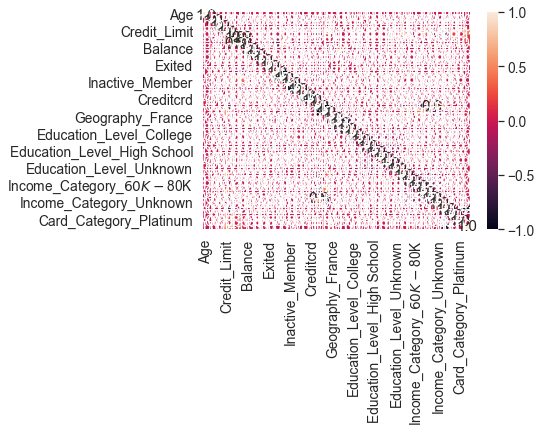

In [197]:
sns.set()
sns.set(font_scale = 1.25)
sns.heatmap(scaled_df.corr(), annot = True,fmt = ".1f")
plt.show()

In [166]:
print("Correlation Coefficient of all the Features to Leaving")
corr = scaled_df.corr()
corr.sort_values(["Exited"], ascending = False, inplace = True)
correlations = corr.Exited
a = correlations[correlations > 0.05]
b = correlations[correlations < -0.05]
top_corr_features = a.append(b)
top_corr_features

Correlation Coefficient of all the Features to Leaving


Exited               1.000000
Geography_Germany    0.173488
Inactive_Member      0.156128
Balance              0.118533
Geography_Spain     -0.052667
Geography_France    -0.104955
Active_Member       -0.156128
Name: Exited, dtype: float64

In [167]:
print("Correlation Coefficient of all the Features to Attrition")
corr = scaled_df.corr()
corr.sort_values(["Attrited_Customer"], ascending = False, inplace = True)
correlations = corr.Attrited_Customer
a = correlations[correlations > 0.01]
b = correlations[correlations < -0.01]
top_corr_features = a.append(b)
top_corr_features

Correlation Coefficient of all the Features to Attrition


Attrited_Customer                 1.000000
Gender_F                          0.038831
Education_Level_Doctorate         0.028549
Income_Category_Less than $40K    0.024185
Age                               0.020205
Geography_Germany                 0.011720
Education_Level_Post-Graduate     0.011619
No_creditcrd                      0.011605
Card_Category_Platinum            0.011170
Creditcrd                        -0.011605
Card_Category_Silver             -0.011925
Income_Category_$40K - $60K      -0.012514
Education_Level_High School      -0.013076
Geography_Spain                  -0.016700
Credit_Limit                     -0.026184
Income_Category_$60K - $80K      -0.028438
Gender_M                         -0.038831
Total_Trans_Amt                  -0.179168
Total_Trans_Ct                   -0.376517
Existing_Customer                -1.000000
Name: Attrited_Customer, dtype: float64

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

heat = scaled_df.corr()
plt.figure(figsize=[16,8])
plt.title("Correlation between numerical features", size = 25, pad = 20, color = '#8cabb6')
sns.heatmap(heat,cmap = sns.diverging_palette(20, 220, n = 200), annot=False)
plt.show()

## Functions to identify feature importances 

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [99]:
X = scaled_df.drop('is_fraud', axis = 1)
y = scaled_df['is_fraud']
def plot_importances(model, model_name, features_to_plot, feature_names):
    #fit model and performances
    model.fit(X,y)
    importances = model.feature_importances_
    
    # sort and rank importances
    indices = np.argsort(importances)
    best_features = np.array(feature_names)[indices][-features_to_plot:]
    values = importances[indices][-features_to_plot:]
    
    # plot a graph
    y_ticks = np.arange(0, features_to_plot)
    fig, ax = plt.subplots()
    ax.barh(y_ticks, values, color = '#b2c4cc')
    ax.set_yticklabels(best_features)
    ax.set_yticks(y_ticks)
    ax.set_title("%s Feature Importances"%(model_name))
    fig.tight_layout()
    plt.show()
    
def best_features(model, features_to_plot, feature_names):
    # get list of best features 
    model.fit(X,y)
    importances = model.feature_importances_

    indices = np.argsort(importances)
    best_features = np.array(feature_names)[indices][-features_to_plot:]
    return best_features

In [100]:
feature_names = list(X.columns)

model1 = RandomForestClassifier(random_state = 1234)
plot_importances(model1, 'Random Forest', 10, feature_names)

model2 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 0)
plot_importances(model2, 'XGBoost', 10, feature_names)

model3 = AdaBoostClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 0)
plot_importances(model3, 'AdaBoost', 10, feature_names)

In [101]:
f_selector = SelectKBest(f_classif, k = 10)
f_selector.fit_transform(X, y)
f_selector_best = f_selector.get_feature_names_out()
print(f_selector_best)

['Age' 'Gender_F' 'Gender_M' 'Geography_France' 'Geography_Spain'
 'Education_Level_College' 'Education_Level_Graduate'
 'Education_Level_High School' 'Card_Category_Blue' 'Card_Category_Silver']


In [102]:
forest_best = list(best_features(model1, 10, feature_names))
XG_best = list(best_features(model2, 10, feature_names))
ada_best = list(best_features(model3, 10, feature_names))
top_corr_features = list(top_corr_features)
f_selector_best = list(f_selector_best)

In [103]:
print(forest_best)

['Exited', 'Inactive_Member', 'NumOfProducts', 'Tenure', 'Age', 'Total_Trans_Ct', 'Balance', 'CreditScore', 'Total_Trans_Amt', 'Credit_Limit']


In [104]:
print(XG_best)

['Education_Level_College', 'Income_Category_Less than $40K', 'Age', 'Tenure', 'Balance', 'Total_Trans_Amt', 'NumOfProducts', 'Total_Trans_Ct', 'CreditScore', 'Credit_Limit']


In [105]:
print(ada_best)

['Education_Level_College', 'Geography_Spain', 'Education_Level_Post-Graduate', 'Tenure', 'Total_Trans_Ct', 'Age', 'CreditScore', 'Balance', 'Total_Trans_Amt', 'Credit_Limit']


In [106]:
best_features_overall = forest_best + XG_best + ada_best  + f_selector_best

# create a dictionary with the number of times features appear 
from collections import Counter
count_best_features = dict(Counter(best_features_overall))

# list of the features without any repeatitions
features_no_repeats = list(dict.fromkeys(best_features_overall))

display(count_best_features)

{'Exited': 1,
 'Inactive_Member': 1,
 'NumOfProducts': 2,
 'Tenure': 3,
 'Age': 4,
 'Total_Trans_Ct': 3,
 'Balance': 3,
 'CreditScore': 3,
 'Total_Trans_Amt': 3,
 'Credit_Limit': 3,
 'Education_Level_College': 3,
 'Income_Category_Less than $40K': 1,
 'Geography_Spain': 2,
 'Education_Level_Post-Graduate': 1,
 'Gender_F': 1,
 'Gender_M': 1,
 'Geography_France': 1,
 'Education_Level_Graduate': 1,
 'Education_Level_High School': 1,
 'Card_Category_Blue': 1,
 'Card_Category_Silver': 1}

## Exploring Binning Options - Age vs Tenure

In [200]:
df['Age'].value_counts()

44    494
49    486
46    484
45    482
47    475
48    467
43    465
50    444
42    421
51    394
53    383
41    376
52    373
40    357
39    330
54    306
38    297
55    275
37    258
56    254
57    220
36    219
35    184
58    155
59    153
34    146
60    126
33    123
32    104
65    101
62     93
61     92
31     88
26     78
30     66
63     65
29     53
64     43
27     31
28     29
67      4
66      2
68      2
70      1
73      1
Name: Age, dtype: int64

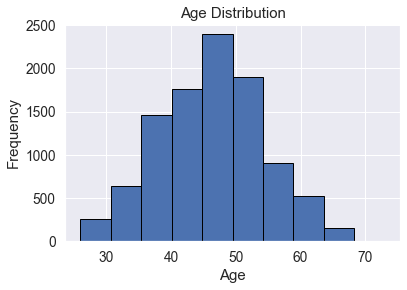

In [202]:
plt.hist(df['Age'], edgecolor='black')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Show the plot
plt.show()

In [203]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

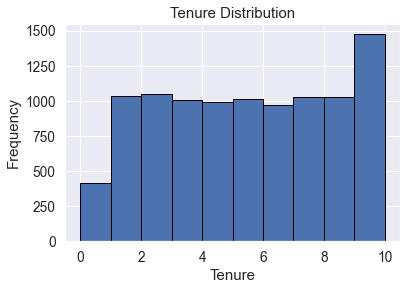

In [205]:
plt.hist(df['Tenure'], edgecolor='black')

# Set labels and title
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')

# Show the plot
plt.show()

In [206]:
print (pd.crosstab(df["Tenure"],df["Exited"]))

Exited    0    1
Tenure          
0       318   95
1       803  232
2       847  201
3       796  213
4       786  203
5       803  209
6       771  196
7       851  177
8       828  197
9       771  213
10      389  101


In [217]:
num_bins = 4  # Number of bins
labels = range(1, num_bins + 1)  # Labels for the bins
df['equal_frequency_bins'], equal_frequency_bins = pd.qcut(df['Age'], q=num_bins, labels=labels, retbins=True)


In [218]:
num_bins = 4  # Number of bins
bin_width = (df['Age'].max() - df['Age'].min()) / num_bins  # Width of each bin
bins = [df['Age'].min() + i * bin_width for i in range(num_bins + 1)]  # Bins boundaries
labels = range(1, num_bins + 1)  # Labels for the bins
df['equal_width_bins'], equal_width_bins = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True, retbins=True)

In [219]:
print("Equal Frequency Bins:")
print(equal_frequency_bins)
print("\nEqual Width Bins:")
print(equal_width_bins)

Equal Frequency Bins:
[26. 41. 46. 52. 73.]

Equal Width Bins:
[26.   37.75 49.5  61.25 73.  ]
